In [20]:
%matplotlib notebook
import time
from pymongo import MongoClient 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from datetime import datetime
from bson.objectid import ObjectId
from matplotlib.animation import FuncAnimation
from collections import Counter

In [21]:
hostip = "10.192.41.222"
client = MongoClient(
        host=f'{hostip}',
        port=27017
    )
db = client["awas_db"]
violation_col = db["violation"]

print(violation_col.count_documents({}))

for doc in violation_col.find().limit(5):
    print(doc)

754
{'_id': '2024-01-01_UTT 229', 'car_plate': 'UTT 229', 'date': '2024-01-01', 'violations': [{'violation_id': '226a97f9-b4d2-4c13-bba3-8cb1e4d19ee7', 'type': 'average', 'camera_id_start': 2, 'camera_id_end': 3, 'timestamp_start': '2024-01-01T08:00:26.887170', 'timestamp_end': '2024-01-01T08:00:54.958092', 'recorded_speed': 128.57142857142858, 'speed_limit': 110.0}, {'violation_id': '568cd9e8-020d-4374-8789-c480f27e0420', 'type': 'instant', 'camera_id_start': 2, 'camera_id_end': 2, 'timestamp_start': '2024-01-01T08:00:26.887170', 'timestamp_end': '2024-01-01T08:00:26.887170', 'recorded_speed': 134.1, 'speed_limit': 110.0}, {'violation_id': 'b975ce64-4412-419e-80a4-7dbf60f59c1c', 'type': 'instant', 'camera_id_start': 3, 'camera_id_end': 3, 'timestamp_start': '2024-01-01T08:00:54.958092', 'timestamp_end': '2024-01-01T08:00:54.958092', 'recorded_speed': 130.8, 'speed_limit': 90.0}, {'violation_id': '551ed1ba-fa58-44ea-8009-c3995d8b7113', 'type': 'average', 'camera_id_start': 1, 'camera_i

In [22]:
from dateutil import parser as dt_parser

all_timestamps = [] 
processed_counts = {} 

def fetch_latest_data():
    global processed_counts
    new_timestamps = []

    # Fetch all documents (you may add filters for date range or limit if needed)
    for doc in collection.find():
        
        doc_id = doc["_id"]
        violations = doc.get("violations", [])
        total = len(violations)
    
        already_seen = processed_counts.get(doc_id, 0)
        
         # Get only new violations
        new_violations = violations[already_seen:]
        processed_counts[doc_id] = total  # update count
        
        for v in new_violations:
            try:
                ts = dt_parser.parse(v["timestamp_start"])
                new_timestamps.append(ts.replace(second=0, microsecond=0))  # round to minute
            except Exception as e:
                print(f"[{doc_id}] Error parsing timestamp:", e)

    return new_timestamps


<IPython.core.display.Javascript object>


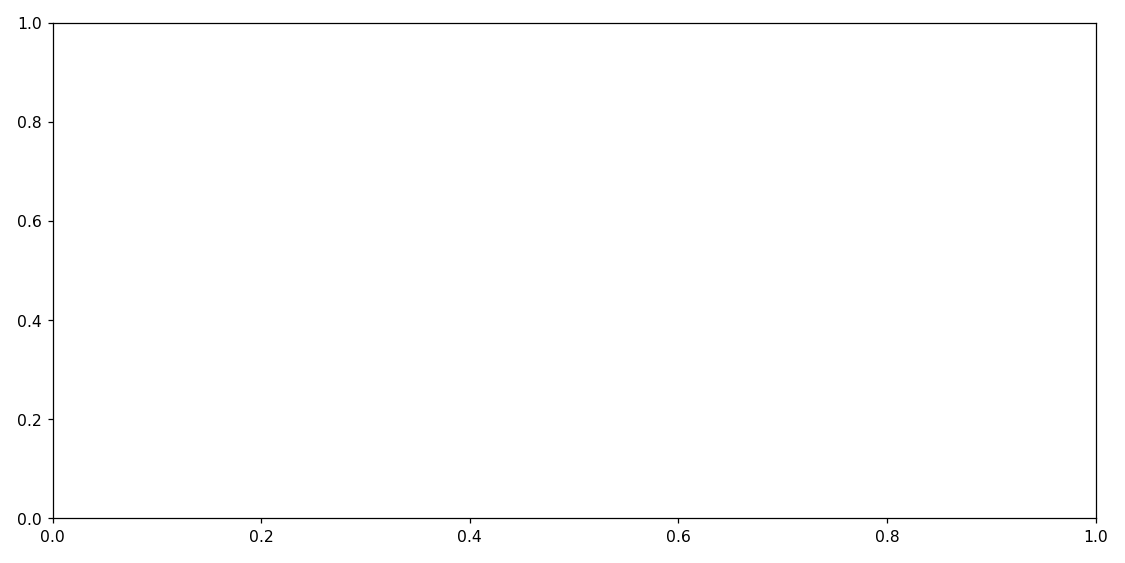

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
# line, = ax.plot([], [], 'bo-')

def update(frame):
    global all_timestamps

    # Fetch new timestamps
    new_data = fetch_latest_data()
    print(f"Fetched {len(new_data)} timestamps")
    for ts in new_data[:10]:
        print(repr(ts))
    all_timestamps.extend(new_times)

    if not all_timestamps:
        print("no data")
        return

    # Count and sort timestamps
    counter = Counter(all_timestamps)
    sorted_times = sorted(counter)
    counts = [counter[t] for t in sorted_times]

    ax.clear()
    ax.plot(sorted_times, counts, 'bo-', label="Violations")
    ax.set_title("Violations per Arrival Time")
    ax.set_xlabel("Arrival Time")
    ax.set_ylabel("Number of Violations")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    ax.grid(True)

ani = FuncAnimation(fig, update, interval=1000, cache_frame_data=False)  # every 60 sec
plt.tight_layout()
plt.show()



Total documents: 276

Document ID: 2024-01-01_UTT 229
  Violations count: 5
    Raw timestamp: 2024-01-01T08:00:26.887170
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:26.887170
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:54.958092
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:00
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:00
    Parsed: 2024-01-01 08:00:00

Document ID: 2024-01-01_CJW 924
  Violations count: 5
    Raw timestamp: 2024-01-01T08:00:26.029536
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:26.029536
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:47.168827
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:01
    Parsed: 2024-01-01 08:00:00
    Raw timestamp: 2024-01-01T08:00:01
    Parsed: 2024-01-01 08:00:00

Document ID: 2024-01-01_CZ 592
  Violations count: 5
    Raw timestamp: 2024-01-01T08:00:26.729115
    Parsed: 2024-

<IPython.core.display.Javascript object>


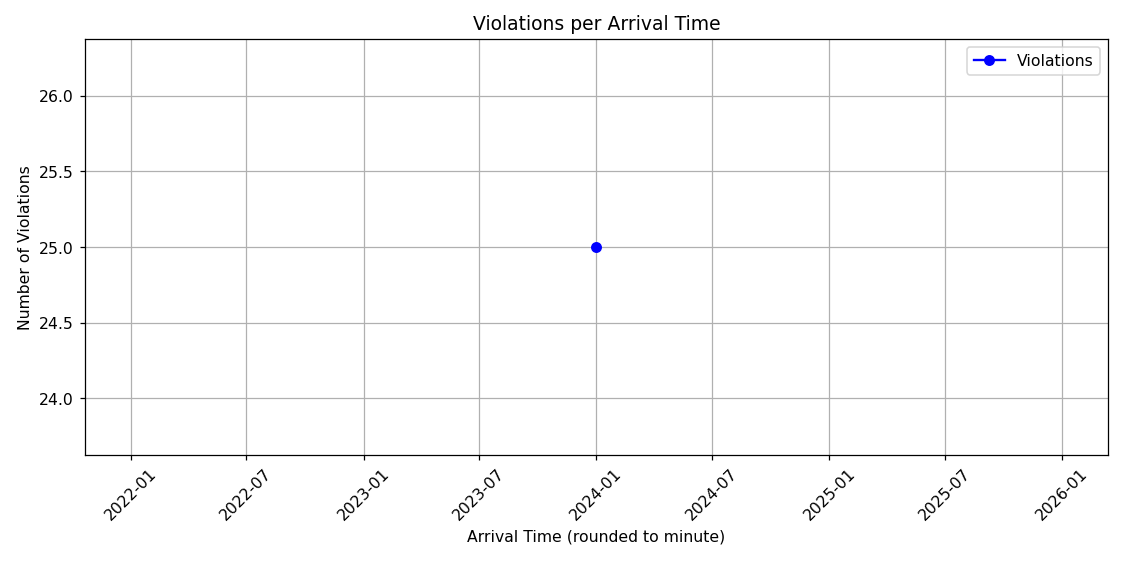

In [19]:
from pymongo import MongoClient
from dateutil import parser as dt_parser

hostip = "10.192.41.222"
client = MongoClient(host=hostip, port=27017)
db = client["awas_db"]
violation_col = db["violation"]

print("Total documents:", violation_col.count_documents({}))

cursor = violation_col.find().limit(5)

timestamps = []

for doc in cursor:
    print(f"\nDocument ID: {doc.get('_id')}")
    violations = doc.get("violations", [])
    print(f"  Violations count: {len(violations)}")

    for v in violations:
        ts_str = v.get("timestamp_start")
        print(f"    Raw timestamp: {ts_str}")
        try:
            ts = dt_parser.parse(ts_str)
            rounded_ts = ts.replace(second=0, microsecond=0)
            print(f"    Parsed: {rounded_ts}")
            timestamps.append(rounded_ts)
        except Exception as e:
            print(f"    Error parsing '{ts_str}': {e}")

print(f"\n✅ Total timestamps parsed: {len(timestamps)}")

from collections import Counter
import matplotlib.pyplot as plt

# Your parsed timestamps list
# timestamps = [...] ← already built from previous step

counter = Counter(timestamps)
sorted_times = sorted(counter)
counts = [counter[t] for t in sorted_times]

print("Time slots:")
for t, c in zip(sorted_times, counts):
    print(f"{t}: {c} violations")

plt.figure(figsize=(10, 5))
plt.plot(sorted_times, counts, 'bo-', label='Violations')
plt.xticks(rotation=45)
plt.xlabel("Arrival Time (rounded to minute)")
plt.ylabel("Number of Violations")
plt.title("Violations per Arrival Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>


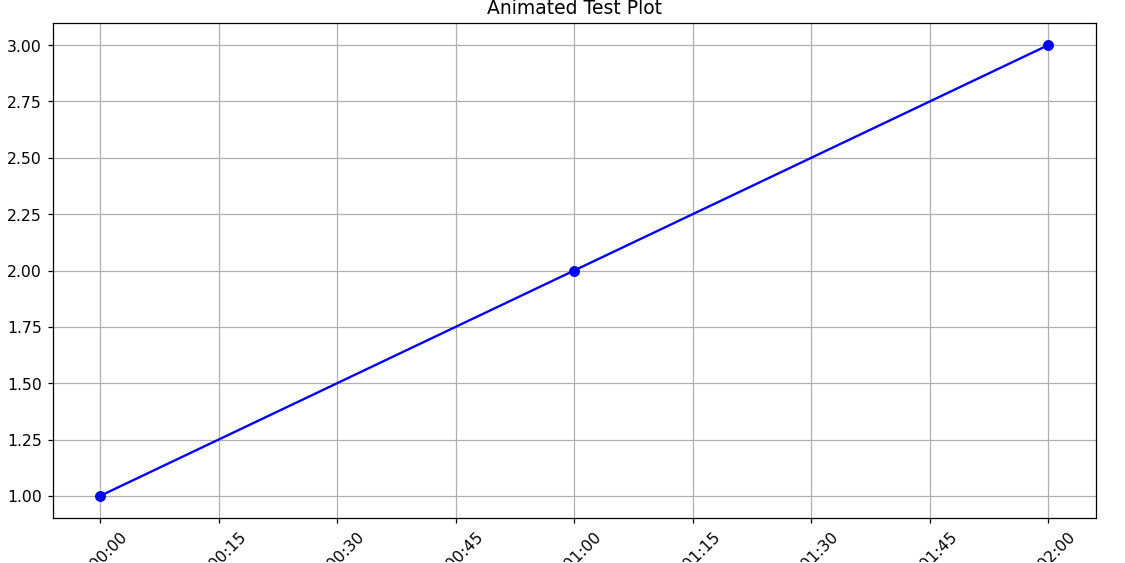

/tmp/ipykernel_3940501/3484625231.py:45: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=1000)  # update every second for test


In [26]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import Counter
from datetime import datetime, timedelta

# Simulate streaming data every frame
simulated_data = [
    datetime(2024, 1, 1, 8, 0),
    datetime(2024, 1, 1, 8, 1),
    datetime(2024, 1, 1, 8, 1),
    datetime(2024, 1, 1, 8, 2),
    datetime(2024, 1, 1, 8, 2),
    datetime(2024, 1, 1, 8, 2),
]

# Each frame adds more timestamps
frame_counter = 0
all_data = []

fig, ax = plt.subplots(figsize=(10, 5))

def update(frame):
    global frame_counter, all_data

    # Add one timestamp per frame for testing
    if frame_counter < len(simulated_data):
        all_data.append(simulated_data[frame_counter])
        frame_counter += 1

    if not all_data:
        return

    counter = Counter(all_data)
    sorted_times = sorted(counter)
    counts = [counter[t] for t in sorted_times]

    ax.clear()
    ax.plot(sorted_times, counts, 'bo-')
    ax.set_title("Animated Test Plot")
    ax.set_xlabel("Arrival Time")
    ax.set_ylabel("Violations")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

ani = FuncAnimation(fig, update, interval=1000)  # update every second for test
plt.tight_layout()
plt.show()
